# UBC Bolt First Byte 2025

#### Mission:

- As audiences shift online, new technologies arise, and competing clubs expand their global footprint, Vancouver City must decide how to evolve and where to invest, in order to secure its future on and off the pitch.
- The club’s mission is to grow the game, empower fans, and strengthen connections between players, supporters, and the city it represents.

#### Context

- sales have continued to decline. Overall earnings have fallen from roughly $60 million in prior years to materially lower levels today
- The club’s three primary sources of revenue, including stadium operations, merchandise sales, and fanbase engagement, have all been impacted by these issues. Matchday turnout and in-stadium spending are falling, online sales are down by 30% compared to prior seasons, and global engagement remains underdeveloped

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [5]:
merch_dat = pd.read_excel(r"data\BOLT UBC First Byte - Merchandise Sales.xlsx")
stadium_dat = pd.read_excel(r"data\BOLT UBC First Byte - Stadium Operations.xlsx")
fan_dat = pd.read_excel(r"data\BOLT UBC First Byte - Fanbase Engagement.xlsx")

In [6]:
merch_dat.sample(5)

,Product_ID,Barcode,Item_Category,Item_Name,Size,Unit_Price,Customer_Age_Group,Customer_Region,Promotion,Channel,Selling_Date,Member_ID,Arrival_Date
1325,10000005,20001325,Jersey,Home Jersey,XL,152,26–40,Domestic,True,Online,2024-02-10 17:02:00,10007800,2024-02-17 16:55:00
54688,10000011,20054688,Scarf,Away Scarf,NaN,40,18–25,Domestic,True,Online,2024-04-28 18:41:00,10025706,2024-05-04 14:33:00
30798,10000015,20030798,Youth Jersey,Youth Away Jersey,YM,90,18–25,Domestic,False,Team Store,2024-07-10 20:03:00,10033189,NaT
7496,10000005,20007496,Jersey,Home Jersey,M,152,<18,International,False,Team Store,2024-02-10 17:09:00,10007797,NaT
37476,10000010,20037476,Poster,Team Poster,NaN,20,26–40,Domestic,True,Online,2024-04-26 14:02:00,10025269,2024-05-04 12:35:00


In [7]:
stadium_dat.sample(5)

,Month,Source,Revenue
31,8,Season,480942
68,9,Staff,-3276000
30,7,Season,289464
106,11,Insurance,-160000
26,3,Season,535923


In [8]:
fan_dat.sample(5)

,Membership_ID,Age_Group,Games_Attended,Seasonal_Pass,Customer_Region
2921,84330769,26-40,5,False,Canada
56938,43954683,60+,4,False,USA
69635,10044141,18-25,7,False,Canada
54463,52799167,26-40,7,False,Canada
34470,10022099,18-25,6,False,Canada


## Summary Statistics and Basic Info

In [9]:
merch_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67877 entries, 0 to 67876
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product_ID          67877 non-null  int64         
 1   Barcode             67877 non-null  int64         
 2   Item_Category       67877 non-null  object        
 3   Item_Name           67877 non-null  object        
 4   Size                52041 non-null  object        
 5   Unit_Price          67877 non-null  int64         
 6   Customer_Age_Group  67877 non-null  object        
 7   Customer_Region     67877 non-null  object        
 8   Promotion           67877 non-null  bool          
 9   Channel             67877 non-null  object        
 10  Selling_Date        67877 non-null  datetime64[ns]
 11  Member_ID           67877 non-null  int64         
 12  Arrival_Date        54302 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), int64(4), objec

In [10]:
stadium_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    144 non-null    int64 
 1   Source   144 non-null    object
 2   Revenue  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [11]:
fan_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Membership_ID    70000 non-null  int64 
 1   Age_Group        70000 non-null  object
 2   Games_Attended   70000 non-null  int64 
 3   Seasonal_Pass    70000 non-null  bool  
 4   Customer_Region  70000 non-null  object
dtypes: bool(1), int64(2), object(2)
memory usage: 2.2+ MB


In [12]:
merch_dat.shape

(67877, 13)

In [13]:
stadium_dat.shape

(144, 3)

In [14]:
fan_dat.shape

(70000, 5)

In [15]:
merch_dat.describe()

,Product_ID,Barcode,Unit_Price,Selling_Date,Member_ID,Arrival_Date
count,6.787700e+04,6.787700e+04,67877.000000,67877,6.787700e+04,54302
mean,1.000001e+07,2.003394e+07,95.129882,2024-05-08 14:45:47.386007296,1.002226e+07,2024-05-16 11:55:46.306581504
min,1.000000e+07,2.000000e+07,20.000000,2023-12-01 00:02:00,1.000000e+07,2023-12-06 09:25:00
25%,1.000000e+07,2.001697e+07,50.000000,2024-02-25 06:41:00,1.001115e+07,2024-03-04 09:38:15
50%,1.000000e+07,2.003394e+07,75.000000,2024-04-13 14:56:00,1.002229e+07,2024-04-21 12:35:30
75%,1.000001e+07,2.005091e+07,152.000000,2024-07-12 15:13:00,1.003338e+07,2024-07-20 14:17:15
max,1.000002e+07,2.006788e+07,152.000000,2024-12-31 23:59:00,1.004452e+07,2025-01-10 18:51:00
std,4.603017e+00,1.959455e+04,49.893563,NaN,1.284130e+04,NaN


In [16]:
stadium_dat.describe()

,Month,Revenue
count,144.000000,1.440000e+02
mean,6.500000,9.189942e+04
std,3.464102,1.341148e+06
min,1.000000,-3.527500e+06
25%,3.750000,-1.751925e+05
50%,6.500000,1.420000e+05
75%,9.250000,4.378755e+05
max,12.000000,3.410190e+06


In [17]:
fan_dat.describe()

,Membership_ID,Games_Attended
count,7.000000e+04,70000.000000
mean,2.464124e+07,5.711414
std,2.595011e+07,5.168150
min,1.370000e+03,1.000000
25%,1.001510e+07,3.000000
50%,1.003260e+07,5.000000
75%,3.167822e+07,7.000000
max,9.999924e+07,30.000000


### Missing Values

In [18]:
merch_dat.isna().sum()

Product_ID                0
Barcode                   0
Item_Category             0
Item_Name                 0
Size                  15836
Unit_Price                0
Customer_Age_Group        0
Customer_Region           0
Promotion                 0
Channel                   0
Selling_Date              0
Member_ID                 0
Arrival_Date          13575
dtype: int64

In [19]:
stadium_dat.isna().sum()

Month      0
Source     0
Revenue    0
dtype: int64

In [20]:
fan_dat.isna().sum()

Membership_ID      0
Age_Group          0
Games_Attended     0
Seasonal_Pass      0
Customer_Region    0
dtype: int64

### Exploring Merch Dat Missing Values

**Size Exploration**

In [29]:
merch_dat.isna().sum().sort_values(ascending=False)

Size                  15836
Arrival_Date          13575
Product_ID                0
Barcode                   0
Item_Category             0
Item_Name                 0
Unit_Price                0
Customer_Age_Group        0
Customer_Region           0
Promotion                 0
Channel                   0
Selling_Date              0
Member_ID                 0
dtype: int64

In [30]:
merch_dat['Size'].value_counts(dropna=False)

Size
NaN    15836
L      11843
M      11769
XL      7266
S       6545
YM      4398
YS      3932
XXL     3521
YL      2767
Name: count, dtype: int64

In [ ]:
# Ask how to deal with this data

#merch_dat['Size'] = merch_dat['Size'].fillna('Not Applicable') filling missing values witih unknown size

#One Hot Encoding
#merch_dat['Size'] = merch_dat['Size'].astype('category')

**Arrival Date Exploration**

In [31]:
merch_dat['Arrival_Date'].isna().mean()

0.19999410698763942

In [34]:
#sns.heatmap(merch_dat.isna(), cbar=False)
#plt.title('Missing Value Pattern – Merchandise Data')
#plt.show()

#Order by Missing Item Category (TY GPT)
merch_dat.groupby('Item_Category')['Arrival_Date'].apply(lambda x: x.isna().mean()).sort_values(ascending=False).head(10)

Item_Category
Poster          0.212020
Mug             0.206436
Cap             0.201973
Scarf           0.200796
Youth Jersey    0.200632
Jersey          0.198645
Youth Hoodie    0.197620
Hoodie          0.197545
Name: Arrival_Date, dtype: float64

In [35]:
# Compute median arrival-to-sell lag per category
#med_lag = (merch_dat['Selling_Date'] - merch_dat['Arrival_Date']).dt.days.median()

# Fill missing arrival dates using selling date minus median lag
#merch_dat['Arrival_Date'] = merch_dat['Arrival_Date'].fillna(
#    merch_dat['Selling_Date'] - pd.to_timedelta(med_lag, unit='d')
#)

## Stadium Analysis

In [40]:
stadium_dat['Source'].value_counts()

Source
Upper Bowl     12
Lower Bowl     12
Season         12
Premium        12
Food           12
Staff          12
Concert        12
Conference     12
Insurance      12
Maintenance    12
Utilities      12
Advertising    12
Name: count, dtype: int64

In [49]:
# Pivot for better readability
stadium_pivot = stadium_dat.pivot_table(values='Revenue', index='Month', columns='Source', aggfunc='sum')
stadium_pivot.head()

Source,Advertising,Concert,Conference,Food,Insurance,Lower Bowl,Maintenance,Premium,Season,Staff,Upper Bowl,Utilities
Month,,,,,,,,,,,,
1,437600,450000,240000,443982,-160000,1154980,-1500000,35145,0,-2765000,25020,-269093
2,485000,0,75000,2777643,-160000,3327450,-540000,398400,527340,-3400000,686664,-220770
3,432000,0,70000,2596206,-160000,3204408,-415000,272160,535923,-3318000,434112,-221023
4,395000,0,146000,2227200,-160000,2628288,-430000,243033,478674,-3362000,390879,-235475
5,372700,285000,71000,1723476,-160000,2122992,-500000,169320,438702,-3361500,286524,-301120


### Fan Analysis

In [42]:
fan_dat.groupby(['Age_Group', 'Customer_Region']).size().sort_values(ascending=False).head(10)

# Remove impossible values
#fan = fan[(fan['Games_Attended'] >= 0) & (fan['Games_Attended'] <= 50)]

# Validate IDs
#fan_dat['Membership_ID'].nunique()  # should match len(fan)

Age_Group  Customer_Region
18-25      Canada             28163
26-40      Canada             15836
41-60      Canada              9486
<18        Canada              6393
60+        Canada              3096
18-25      USA                 2245
26-40      USA                 1252
41-60      USA                  730
<18        USA                  496
18-25      India                313
dtype: int64

### Duplicate Values

In [21]:
merch_dat.duplicated().sum()

0

In [22]:
stadium_dat.duplicated().sum()

0

In [23]:
fan_dat.duplicated().sum()

0

No Duplicate Values

## EDA

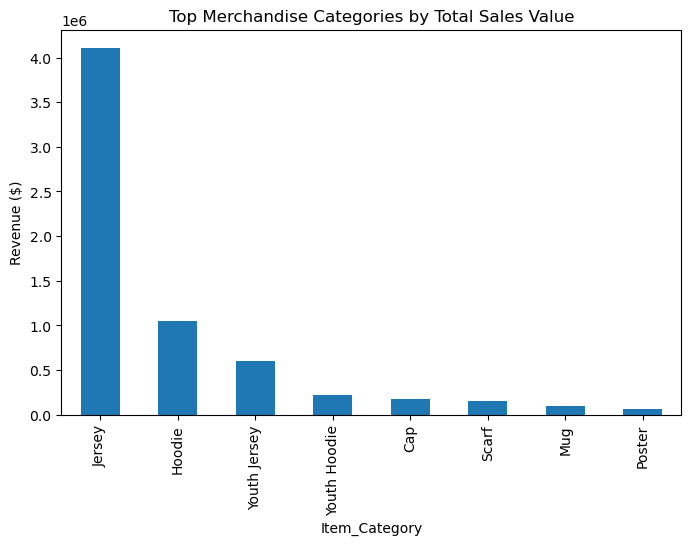

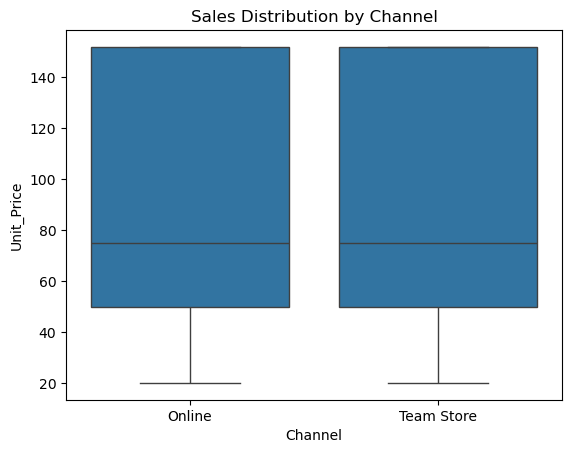

In [45]:
# Top-selling categories
plt.figure(figsize=(8,5))
merch_dat.groupby('Item_Category')['Unit_Price'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top Merchandise Categories by Total Sales Value')
plt.ylabel('Revenue ($)')
plt.show()

# Channel performance
sns.boxplot(x='Channel', y='Unit_Price', data=merch_dat)
plt.title('Sales Distribution by Channel')
plt.show()

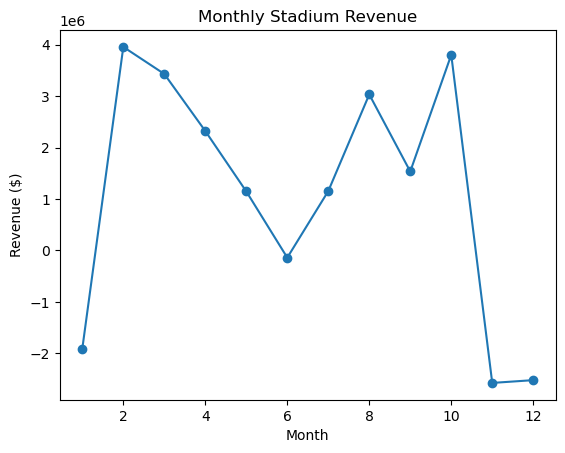

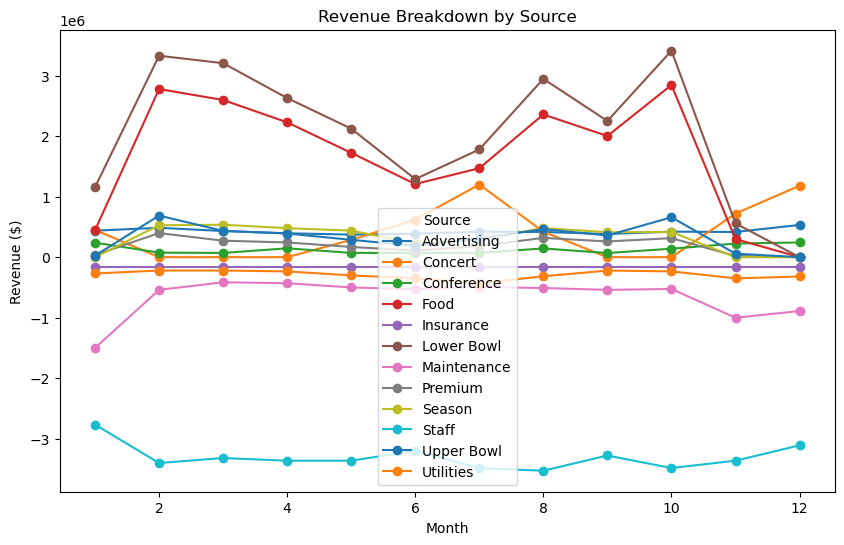

In [51]:
# Monthly revenue trend
stadium_dat.groupby('Month')['Revenue'].sum().plot(marker='o')
plt.title('Monthly Stadium Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.show()

# Compare sources (ticket, concessions, etc.)
stadium_pivot.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Revenue Breakdown by Source')
plt.ylabel('Revenue ($)')
plt.show()

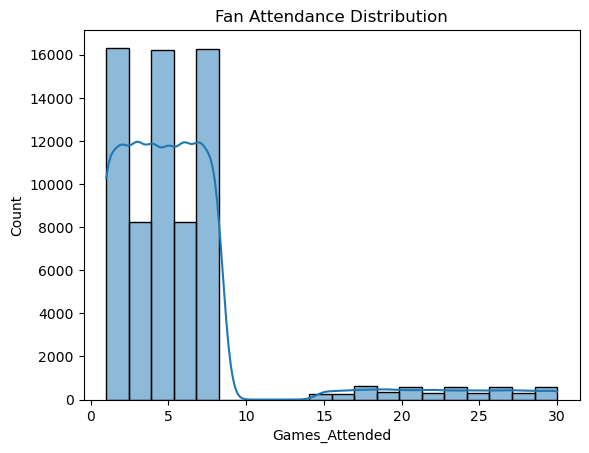

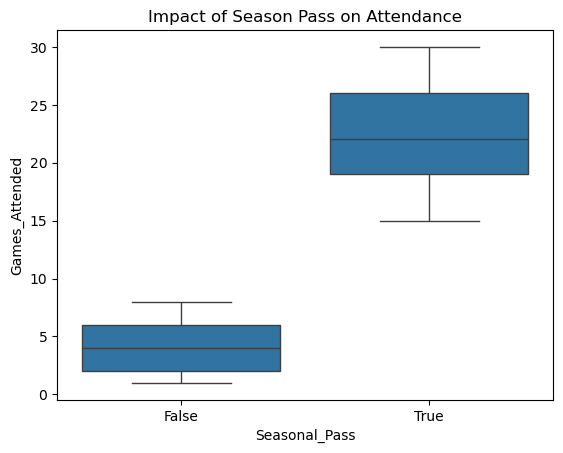

In [52]:
# Attendance distribution
sns.histplot(fan_dat['Games_Attended'], bins=20, kde=True)
plt.title('Fan Attendance Distribution')
plt.show()

# Seasonal pass effect
sns.boxplot(x='Seasonal_Pass', y='Games_Attended', data=fan_dat)
plt.title('Impact of Season Pass on Attendance')
plt.show()

### Feature Engineer

#### Merch

In [54]:
# 1. Days to Sell (only where both dates are present)
merch_dat['Days_to_Sell'] = (merch_dat['Selling_Date'] - merch_dat['Arrival_Date']).dt.days
merch_dat['Days_to_Sell'] = merch_dat['Days_to_Sell'].clip(lower=0)

# 2. Discounted Item (Promotion → 0/1)
merch_dat['Discounted_Item'] = merch_dat['Promotion'].astype(int)

# 3. Revenue proxy (assuming each row = 1 sold item)
merch_dat['Revenue'] = merch_dat['Unit_Price']  # if quantity not given

# 4. Youth-size flag
merch_dat['Is_Youth_Size'] = merch_dat['Size'].str.contains('Y|Youth', case=False, na=False).astype(int)

# --- Quick check ---
merch_dat[['Unit_Price', 'Discounted_Item', 'Is_Youth_Size', 'Days_to_Sell', 'Revenue']].head()

,Unit_Price,Discounted_Item,Is_Youth_Size,Days_to_Sell,Revenue
0,35,0,0,0.0,35
1,35,0,0,NaN,35
2,35,0,0,NaN,35
3,35,1,0,0.0,35
4,35,0,0,NaN,35


## Simple Visualizations

Text(0.5, 1.0, 'Distribution of Merchandise Prices')

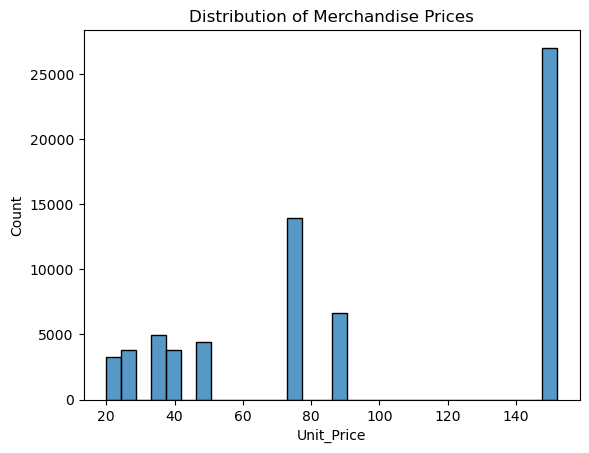

In [24]:
sns.histplot(merch_dat['Unit_Price'], bins=30)
plt.title("Distribution of Merchandise Prices")

<Axes: title={'center': 'Top-Selling Categories'}, ylabel='Item_Category'>

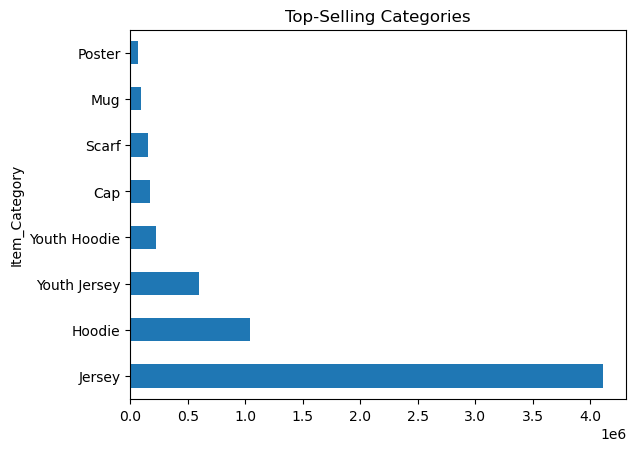

In [25]:
sales_by_cat = merch_dat.groupby('Item_Category')['Unit_Price'].sum().sort_values(ascending=False)
sales_by_cat.head(10).plot(kind='barh', title='Top-Selling Categories')

Text(0.5, 1.0, 'Daily Sales Trend')

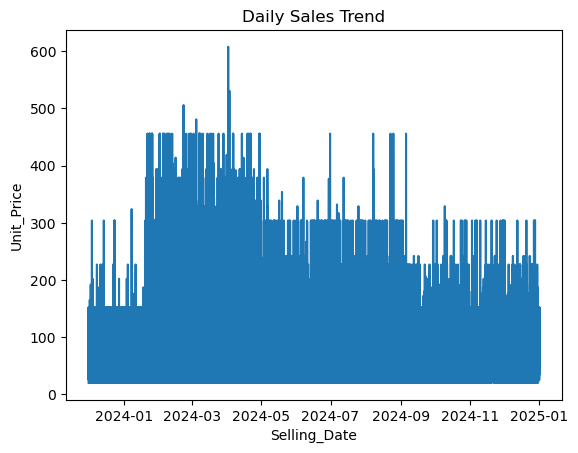

In [26]:
sales_by_day = merch_dat.groupby('Selling_Date')['Unit_Price'].sum().reset_index()
sns.lineplot(x='Selling_Date', y='Unit_Price', data=sales_by_day)
plt.title('Daily Sales Trend')

<Axes: xlabel='Promotion', ylabel='Unit_Price'>

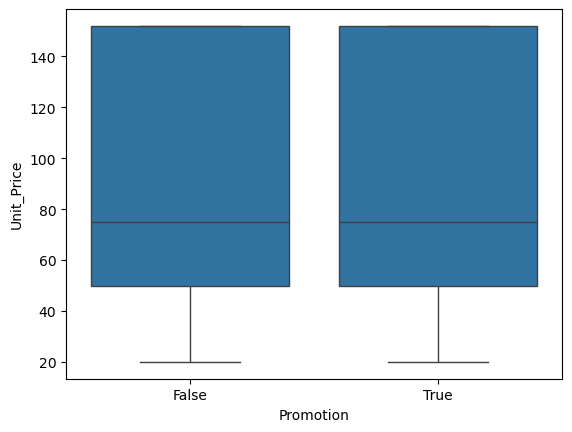

In [27]:
sns.boxplot(x='Promotion', y='Unit_Price', data=merch_dat)

<Axes: xlabel='Channel', ylabel='Unit_Price'>

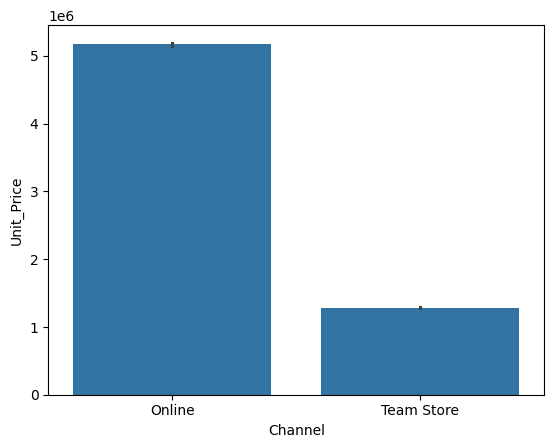

In [28]:
sns.barplot(x='Channel', y='Unit_Price', data=merch_dat, estimator='sum')

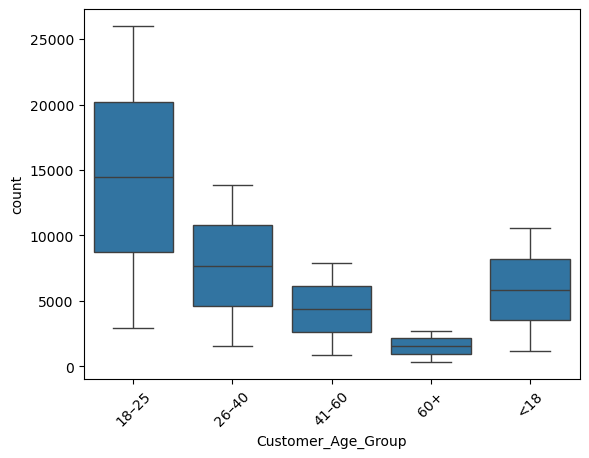

In [37]:
inconsistent_age_region = merch_dat.groupby(['Customer_Age_Group', 'Customer_Region']).size().reset_index(name='count')
# visualize unusual combos (e.g., regions with extremely low counts)
sns.boxplot(x='Customer_Age_Group', y='count', data=inconsistent_age_region)
plt.xticks(rotation=45)
plt.show()
